In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_utils import *
from photoz_plots import *

In [2]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  # Restrict TensorFlow to only allocate 10GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
nn_small = pd.read_csv('/predictions/HSC_v6_NN_neurips_small_v3/testing_metrics.csv')
nn_full = pd.read_csv('/predictions/HSC_v6_NN_neurips_test_v3/testing_metrics.csv')
cnn_small = pd.read_csv('/predictions/HSC_v6_NN_neurips_combined_with_5pool_v3/testing_metrics.csv')

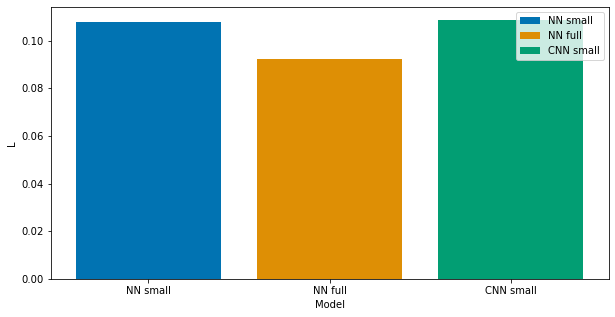

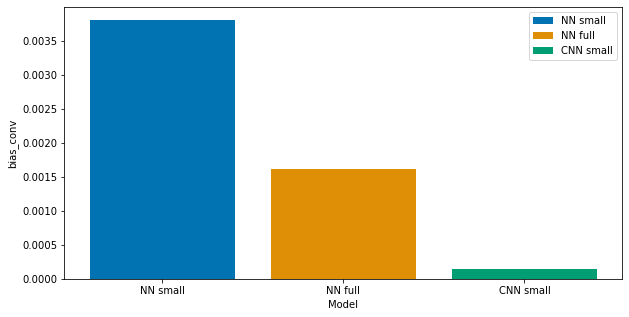

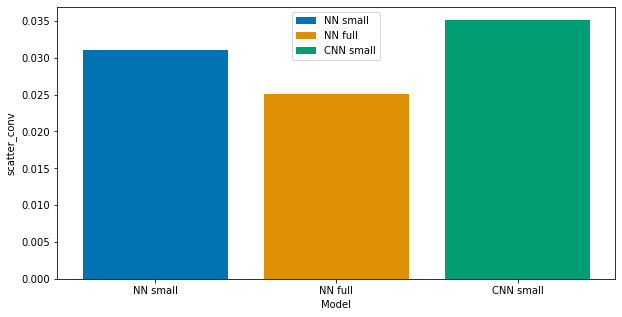

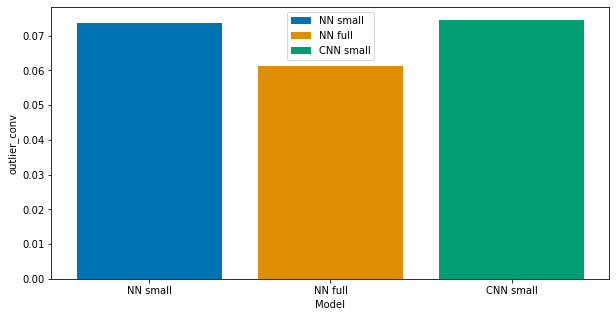

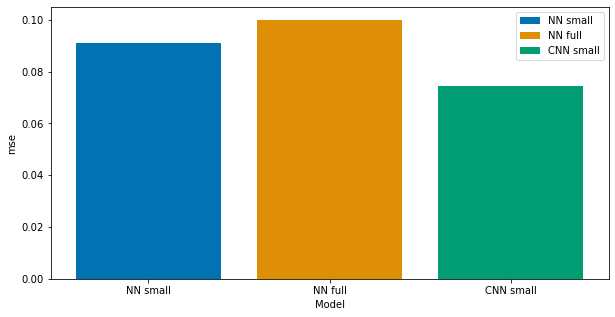

In [4]:
compare_point_metrics_bar([nn_small, nn_full, cnn_small], ['NN small', 'NN full', 'CNN small'])

In [5]:
nn_small_pred = pd.read_csv('/predictions/HSC_v6_NN_neurips_small_v2/testing_predictions.csv')
nn_full_pred = pd.read_csv('/predictions/HSC_v6_NN_neurips_test_v2/testing_predictions.csv')
cnn_small_pred = pd.read_csv('/predictions/HSC_v6_NN_neurips_combined_with_5pool_v2/testing_predictions.csv')

In [6]:
nn_small_pred

,photoz,specz,object_id
0,0.284426,0.43602,36407046198803509
1,0.229355,0.23209,36407046198804043
2,0.539898,0.56511,36407050493759629
3,0.572595,0.55775,36407050493773284
4,0.459731,0.44495,36407054788744371
...,...,...,...
1995,0.447608,0.45520,37489098784529942
1996,0.317820,0.32095,37489103079495574
1997,0.032862,0.08397,37489103079502433
1998,0.665193,0.65020,37489107374444575
